# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, implemented a traffic sign recongnition classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import cv2

# Load training, validation and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print ("Pickle data has been loaded.")

#validated data
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print ("Pickle data has been validated.")

#sumaarize data
print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))



Pickle data has been loaded.
Pickle data has been validated.

Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Implemented basic data summary using ython, numpy and csv

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [48]:
#Again summarize data
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:4]

#find supported classes from class list csv.
import csv
classes = []
with open('signnames.csv', newline='') as csvfile:
    class_list = csv.reader(csvfile, delimiter=',')
    n_classes = -1 #first row is header
    for row in class_list:
        n_classes = n_classes + 1
        if n_classes != 0:
            classes.append(row[1])


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("classes =", classes)
X_print = X_train
y_print = y_train

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43
classes = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go stra

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s) of train, validation and test.
Plotted images


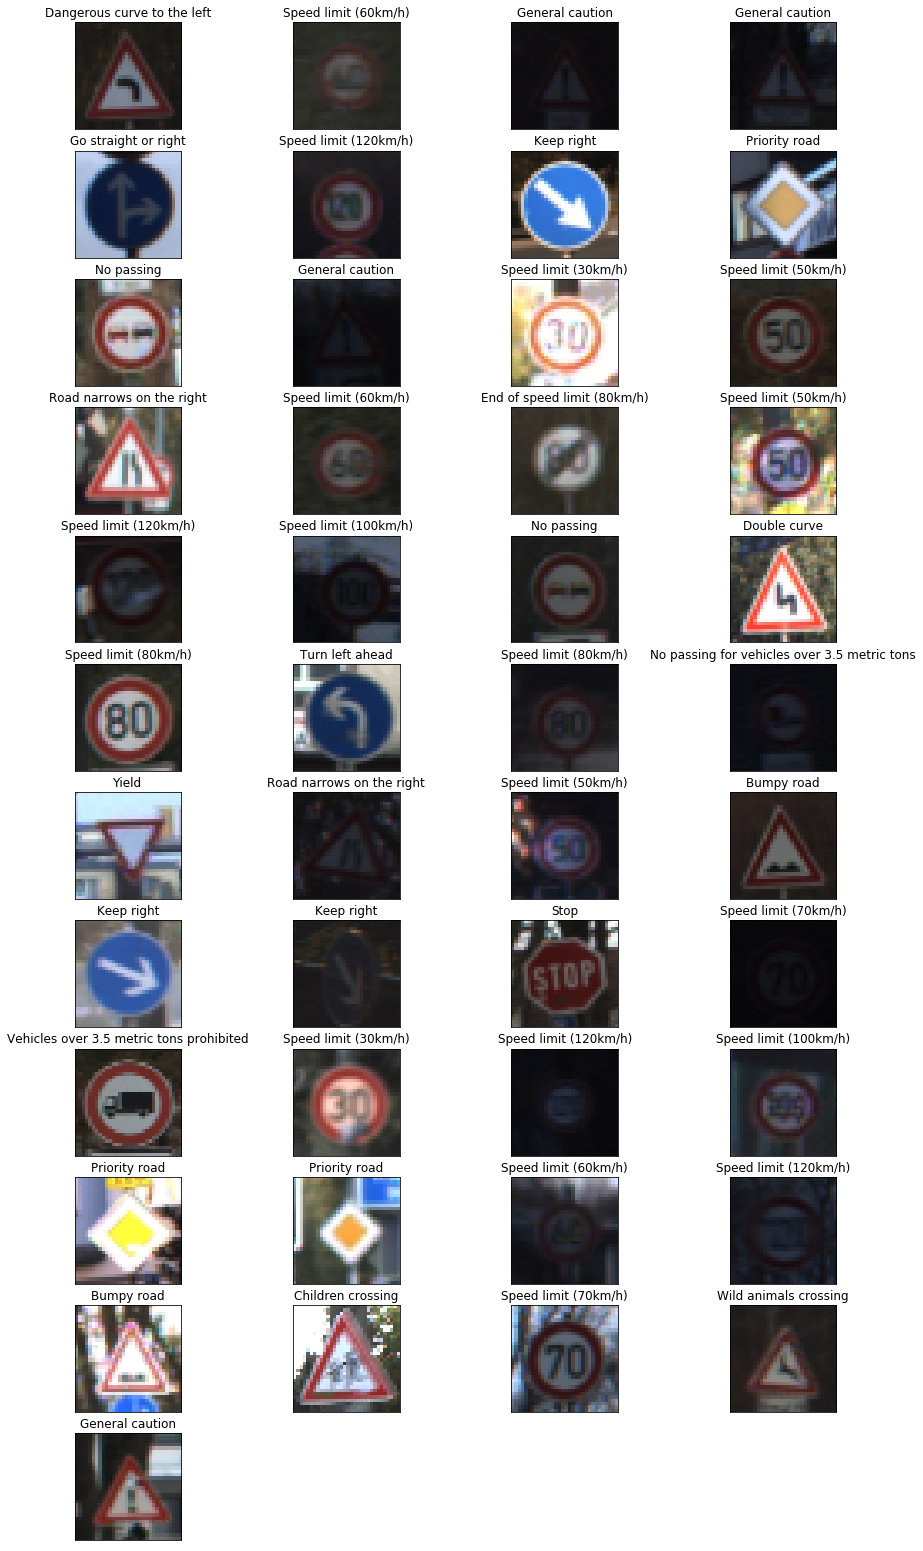

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[15, 35])
rows = 15
cols = 4
cnt = 1

def image_draw(dataa, datab, c, index = -1):
    if index == -1:
        index = random.randint(0, len(dataa))
    image = dataa[index].squeeze()

    plt.subplot(rows, cols, c)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

    plt.title(classes[datab[index]])
    image = image.squeeze()
    plt.imshow(image)
    
    #plt.imshow(image, cmap='gray')
    return c + 1

for row in range(rows):  
    #column 1
    cnt = image_draw(X_train, y_train, cnt)
    #column 2
    cnt = image_draw(X_valid, y_valid, cnt)
    #column 3
    cnt = image_draw(X_test, y_test, cnt)

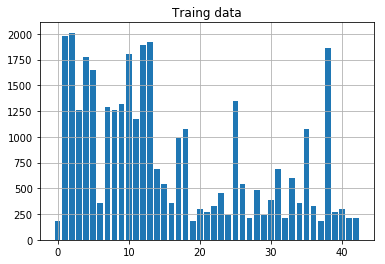

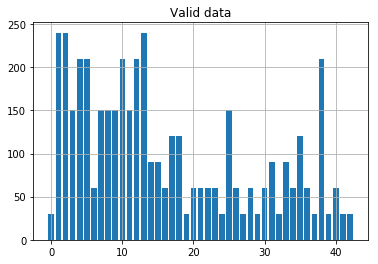

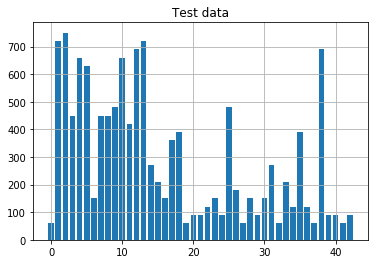

In [4]:
#shuffle data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.grid()
plt.title("Traing data")
plt.show()

unique, counts = np.unique(y_valid, return_counts=True)
plt.bar(unique, counts)
plt.grid()
plt.title("Valid data")
plt.show()

unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)
plt.grid()
plt.title("Test data")
plt.show()



----

## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)

In [5]:
### converting to grayscale.
def norm(data):
    #return data
    data = np.sum(data/3, axis=3, keepdims=True)
    return np.array(data / 255.0 - 0.5 )

X_train = norm(X_train)
X_valid = norm(X_valid)
X_test = norm(X_test)

#X_train = X_train/127.5-1
#X_valid = X_valid/127.5-1
#X_test = X_test/127.5-1
#X_train = np.array(X_train / 255.0 - 0.5 )
#X_valid = np.array(X_valid / 255.0 - 0.5 )
#X_test = np.array(X_test / 255.0 - 0.5 )



### Model Architecture

In [6]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128


def max_pool(conv, size, stride):
    return tf.nn.max_pool(conv, ksize=[1,size, size, 1], strides=[1, stride, stride, 1], padding='VALID')

def conv2d(x, w, b):
    return tf.nn.conv2d(x, w, strides=[1,1,1,1], padding='VALID') + b

def activation(x):
    return tf.nn.relu(x)

def LeNetMore(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    wc1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    bc1 = tf.Variable(tf.zeros(16))
    conv1 = conv2d(x, wc1, bc1)
    conv1 = activation(conv1) # Layer1: ReLU Activation.
    conv1 = max_pool(conv1, 2, 2) # Layer1: Pooling. Input = 28x28x16. Output = 14x14x16.wc1
    
    # Layer 2: Convolutional. Output = 10x10x32.
    wc2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    bc2 = tf.Variable(tf.zeros(32))
    conv2 = conv2d(conv1, wc2, bc2)
    conv2 = activation(conv2) # Layer2: Activation.
    conv2 = max_pool(conv2, 2, 2)# Layer2: Pooling. Input = 10x10x32. Output = 5x5x32.
      
  #  wc3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 412), mean = mu, stddev = sigma))
  #  bc3 = tf.Variable(tf.zeros(412))
  #  conv3 = conv2d(conv2, wc3, bc3)
  #  conv3 = activation(conv3)# Layer3: Activation.
  #  conv3 = max_pool(conv3, 2, 2)# Layer3: Pooling. Input = 10x10x16. Output = 5x5x16.
    #drop = tf.nn.dropout(conv2, 0.5)

    # Layer2: FC0: Flatten. Input = 5x5x32. Output = 800.
    fc0 = flatten(conv2)
    
    # Layer 3: FC1: Fully Connnected. Input = 800. Output = 564.
    wfc1 = tf.Variable(tf.truncated_normal(shape=(800, 564), mean = mu, stddev = sigma))
    bfc1 = tf.Variable(tf.zeros(564))
    fc1 = tf.matmul(fc0, wfc1) + bfc1
    fc1 = activation(fc1)
    drop1 = tf.nn.dropout(fc1, 0.8)

     #Layer 4: FC2: Fully Connected. Input = 564. Output = 324.
    wfc2 = tf.Variable(tf.truncated_normal(shape=(564, 324), mean = mu, stddev = sigma))
    bfc2 = tf.Variable(tf.zeros(324))
    fc2 = tf.matmul(drop1, wfc2) + bfc2
    fc2 = activation(fc2)
    drop2 = tf.nn.dropout(fc2, 0.8)

    # Layer 5: FC3: Fully Connected. Input = 84. Output = 43.
   # wfc3 = tf.Variable(tf.truncated_normal(shape=(300, 100), mean = mu, stddev = sigma))
    #bfc3 = tf.Variable(tf.zeros(100))
    #fc3 = tf.matmul(fc2, wfc3) + bfc3
    
     # Layer 5: FC3: Fully Connected. Input = 324. Output = 43.
    wfc4 = tf.Variable(tf.truncated_normal(shape=(324, 43), mean = mu, stddev = sigma))
    bfc4 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(drop2, wfc4) + bfc4
     
    
    return logits

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Training model

rate = 0.001

logits = LeNetMore(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [9]:
### Calculate and report the accuracy on the training and validation set.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1)),
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_traffic')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.835

EPOCH 2 ...
Validation Accuracy = 0.884

EPOCH 3 ...
Validation Accuracy = 0.898

EPOCH 4 ...
Validation Accuracy = 0.920

EPOCH 5 ...
Validation Accuracy = 0.911

EPOCH 6 ...
Validation Accuracy = 0.927

EPOCH 7 ...
Validation Accuracy = 0.927

EPOCH 8 ...
Validation Accuracy = 0.923

EPOCH 9 ...
Validation Accuracy = 0.932

EPOCH 10 ...
Validation Accuracy = 0.924

EPOCH 11 ...
Validation Accuracy = 0.939

EPOCH 12 ...
Validation Accuracy = 0.933

EPOCH 13 ...
Validation Accuracy = 0.938

EPOCH 14 ...
Validation Accuracy = 0.944

EPOCH 15 ...
Validation Accuracy = 0.923

EPOCH 16 ...
Validation Accuracy = 0.940

EPOCH 17 ...
Validation Accuracy = 0.937

EPOCH 18 ...
Validation Accuracy = 0.944

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 21 ...
Validation Accuracy = 0.941

EPOCH 22 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy = 0.945

EPOCH 24 ...
Validation Accura

In [50]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(test_accuracy))
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(test_accuracy))
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training Accuracy = 0.999
Valid Accuracy = 0.965
Test Accuracy = 0.934


---

## Step 3: Test a Model on random Images from test data


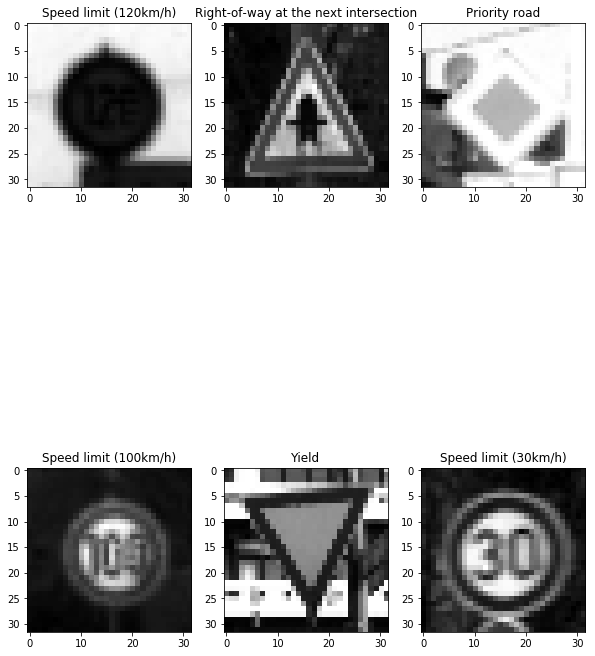

In [12]:
plt.figure(figsize=[10, 15])
rows = 2
cols = 3
num_examples = rows * cols

def image_draw2(dataa, datab, c, index = -1):
    image = dataa[index].squeeze()
    plt.subplot(rows, cols, c)
    plt.title(classes[datab[index]])
    plt.imshow(image, cmap='gray')
    return c + 1


prediction = tf.argmax(logits, 1)
saver = tf.train.Saver()

def inference(X_data, y_data, num):
    num_examples = 2
    batch_cnt = 1
    cnt = 1
    output = []
    predict = []
    sess = tf.get_default_session()
    for i in range(num):
        #randomly select image index to start        
        index = random.randint(0, len(X_data))
        
        #draw image, this may take while...
        cnt = image_draw2(X_data, y_data, cnt, index)
        output.append(y_test[index])
     
        #run through inference 
        batch_x, batch_y = X_data[index:index+batch_cnt], y_data[index:index+batch_cnt]
        accuracy = sess.run(prediction, feed_dict={x: batch_x})
        predict.append(accuracy[0])
        
    return output, predict



with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output, predict = inference(X_test, y_test, num_examples)
    #print ("Expected output list :", output)
    #print ("Expected predict list:", predict)

---

## Step 4: Test a Model on New Images

Below random 5 web selected image files downloaded, loaded and predcited using trained data.

In [13]:
import glob
import cv2

new_glob = np.array(glob.glob('new_images/*.png'))
X_new = []
for path in new_glob:
    simage = cv2.imread(path)
    gray = cv2.cvtColor(simage, cv2.COLOR_BGR2RGB)
    simage = cv2.resize(simage, (32, 32))
    X_new.append(simage)

X_new = np.asarray(X_new)
X_new = norm(X_new)                      

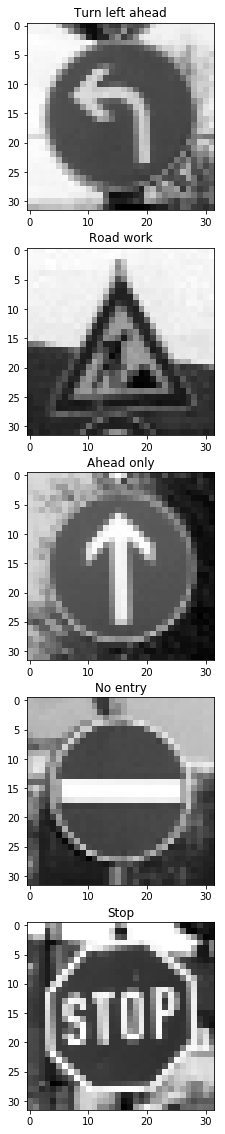

In [14]:
plt.figure(figsize=[15, 20])
rows = 5
cols = 1
num_examples = rows * cols
prediction = tf.argmax(logits, 1)
saver = tf.train.Saver()

def image_draw3(dataa, class_index, c, index):
    image = dataa[index].squeeze()
    plt.subplot(rows, cols, c)
    plt.title(classes[class_index])
    plt.imshow(image, cmap='gray')
    return c + 1
    
def inference2(X_data, num):
    batch_cnt = 1
    cnt = 1
    output = []
    predict = []
    sess = tf.get_default_session()
    for index in range(num):
        #randomly select image index to start        
                         
        #run through inference 
        batch_x = X_data[index:index+batch_cnt]
        accuracy = sess.run(prediction, feed_dict={x: batch_x})
        cnt = image_draw3(X_data, accuracy[0], cnt, index)
        predict.append(accuracy[0])
        
    return output, predict

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output, predict = inference2(X_new, num_examples)

### Performance and Output Top 5 Softmax Probabilities For Each Image Found on the Web

#### A. Top 5 labels predicted for each images
    Predicted images drawn here for 5 images in each row.
    First column is original image and most matching prediction. Remaining columns are next next probable classes.
#### B. Bar chart with probabilities 
    For each image from web bar chart and probabilities displayed.

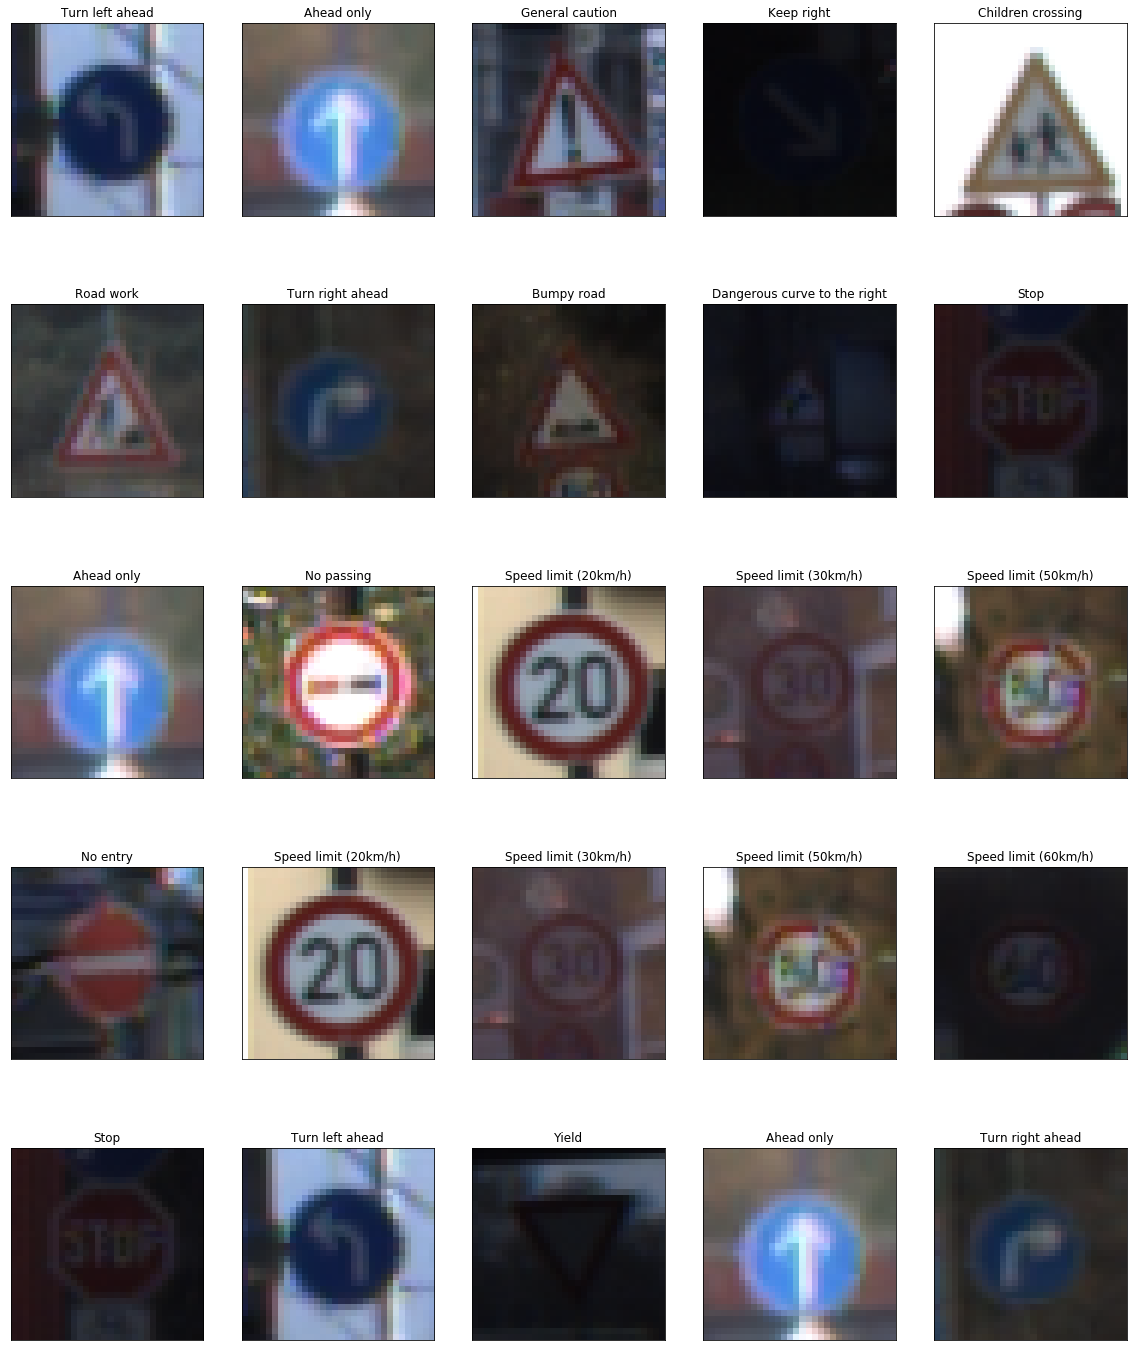

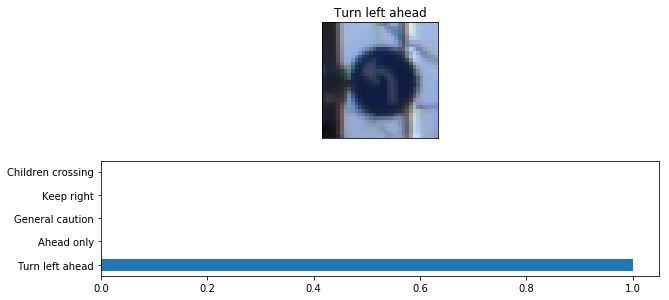

[  1.00000000e+00   2.21157897e-34   5.46027457e-36   1.62023536e-36
   4.17844647e-37]


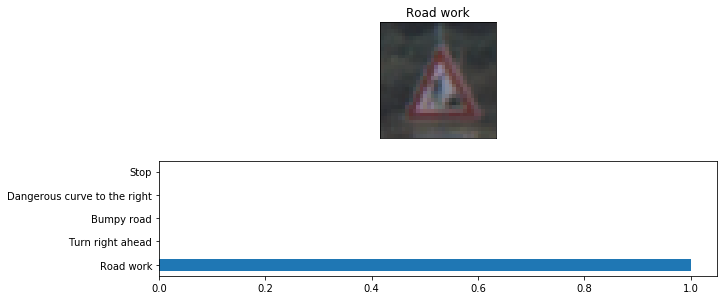

[  1.00000000e+00   1.35693282e-27   7.29648671e-29   9.40850691e-32
   6.12877481e-32]


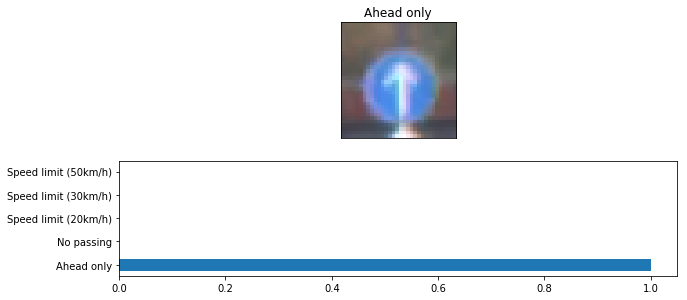

[  1.00000000e+00   2.08934203e-33   0.00000000e+00   0.00000000e+00
   0.00000000e+00]


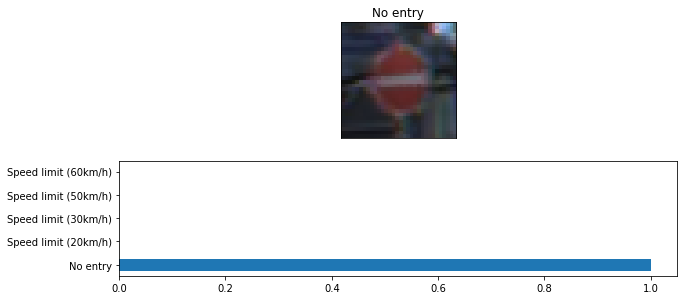

[ 1.  0.  0.  0.  0.]


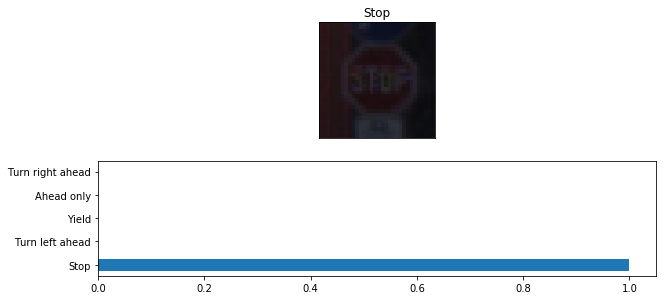

[  1.00000000e+00   2.95447925e-19   5.06368891e-26   2.60628396e-27
   2.69504285e-28]


In [47]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


topk = 5
sm_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(sm_logits, k=topk)

plt.figure(figsize=[20, 25])

def image_draw4(output, c):
    
    for i in range(topk):
        image = X_print[np.argwhere(y_print == output[1][0][i])[0]].squeeze()
        title = classes[output[1][0][i]]
        plt.subplot(5, topk, c)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.title(title)
        plt.imshow(image)
        c = c + 1
    return c


def draw_prob(predict, num):
    
    index = np.arange(num)
    
    for i in range(num):
        c = 1
        plt.figure(figsize=[10, 25])
        output = predict[i]
        image = X_print[np.argwhere(y_print == output[1][0][0])[0]].squeeze()
        title = classes[output[1][0][0]]
        plt.subplot(num*2, 1, c)
       
        plt.title(title)
        plt.imshow(image)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        
        plt.subplot(num*2, 1, c + 1)
        #unique, counts = np.unique(output[0][0], return_counts=True)
        #plt.bar(unique, counts)
        #plt.grid()
        #plt.title("Test data")
        #plt.show()
        
        plt.barh(index, output[0][0], height=0.5, align='center')
        plt.yticks(index, [classes[output[1][0][j]] for j in index] )
        plt.show()
        print (output[0][0])
        
        c = c + 1
    return c


def inference3(X_data, num):
    batch_cnt = 1
    cnt = 1
    c = 1
    predict = []
    sess = tf.get_default_session()
    for index in range(num):
        batch_x = X_data[index:index+batch_cnt]
        output = sess.run(top_k, feed_dict={x: batch_x})
        c = image_draw4(output, c)
        predict.append(output)
    return predict
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predict = inference3(X_new, 5)
    draw_prob(predict, 5)